# Radiative Processes and Stellar Atmospheres Final Project
## Fall 2023 Prof. Ezzeddine

**Part I** - Let’s start with a model for the radial profiles of various physical
quantities in the τ < 1 region. First find the file falc.dat.txt, on Canvas. This
is a solar atmosphere model by Fontenla et al. (1993), derived using the plane-
parallel and hydrostatic equilibrium assumptions. Parts [a.] through [k.]
below ask you to explore this model. You’re going to plot a few quantities
of interest in the atmosphere to diagnose some of the physical properties of the
Sun (and stars in general).

In [2]:
import numpy as np

In [3]:
# Read in the table
import pandas as pd
df = pd.read_fwf('falc.dat.txt', skiprows=14, 
            names=['height',                     # height in atmosphere above tau_5000A (km) 
                   'tau_5000A',                  # radial optical depth in continuum at 5000A (unitless)
                   'colDen',                     # mass column density, (g/cm^2)
                   'temp',                       # temperature, (K) 
                   'vTurb',                      # turbulent velocity, (km/s) 
                   'n_H',                        # neutral hydrogen density (cm^-3)
                   'n_p',                        # free proton density (cm^-3)
                   'n_e',                        # free electron density (cm^-3)
                   'Ptot',                       # total pressure (dyne/cm^2)
                   'beta',                       # P_gas/P_tot
                   'rho'])                       # mass density (g/cm^3)

In [4]:
dn = pd.read_fwf('falc.dat.txt', skiprows=14, 
            names=['height',                     # height in atmosphere above tau_5000A (km) 
                   'tau_5000A',                  # radial optical depth in continuum at 5000A (unitless)
                   'colDen',                     # mass column density, (g/cm^2)
                   'temp',                       # temperature, (K) 
                   'vTurb',                      # turbulent velocity, (km/s) 
                   'n_H',                        # neutral hydrogen density (cm^-3)
                   'n_p',                        # free proton density (cm^-3)
                   'n_e',                        # free electron density (cm^-3)
                   'Ptot',                       # total pressure (dyne/cm^2)
                   'beta',                       # P_gas/P_tot
                   'rho'])                       # mass density (g/cm^3)

In [5]:
#Visually inspect the table
df

,height,tau_5000A,colDen,temp,vTurb,n_H,n_p,n_e,Ptot,beta,rho
0,2218.20,0.000000e+00,0.000007,100000,11.73,5.575000e+09,5.575000e+09,6.665000e+09,0.1857,0.952,1.306000e-14
1,2216.50,7.696000e-10,0.000007,95600,11.65,5.838000e+09,5.837000e+09,6.947000e+09,0.1857,0.950,1.368000e-14
2,2214.89,1.531000e-09,0.000007,90816,11.56,6.151000e+09,6.150000e+09,7.284000e+09,0.1858,0.948,1.441000e-14
3,2212.77,2.597000e-09,0.000007,83891,11.42,6.668000e+09,6.667000e+09,7.834000e+09,0.1859,0.945,1.562000e-14
4,2210.64,3.754000e-09,0.000007,75934,11.25,7.381000e+09,7.378000e+09,8.576000e+09,0.1860,0.941,1.729000e-14
...,...,...,...,...,...,...,...,...,...,...,...
75,-60.00,5.858000e+00,6.174000,8220,1.77,1.307000e+17,1.022000e+15,1.050000e+15,169100.0000,0.972,3.062000e-07
76,-70.00,8.362000e+00,6.481000,8540,1.79,1.317000e+17,1.515000e+15,1.546000e+15,177600.0000,0.972,3.085000e-07
77,-80.00,1.196000e+01,6.790000,8860,1.80,1.325000e+17,2.180000e+15,2.215000e+15,186000.0000,0.973,3.104000e-07
78,-90.00,1.695000e+01,7.102000,9140,1.82,1.337000e+17,2.942000e+15,2.979000e+15,194600.0000,0.973,3.134000e-07


### a. Plot the temperature T vs. the height h, and describe the various regimes in the atmosphere. Where do absorption lines typically form? Where do emission lines typically form?

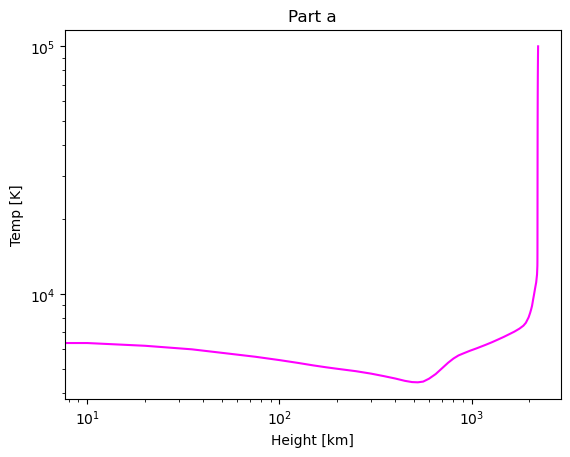

In [6]:
import matplotlib.pyplot as plt

plt.plot(df['height'], df['temp'], color='magenta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Height [km]')
plt.ylabel('Temp [K]')
plt.title('Part a');

In [7]:
# Find the index for tau = 1 and tau = 2/3
np.where(df['tau_5000A'] < 2/3)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),)

In [8]:
df['tau_5000A'][67] #tau = 2/3
ind_eff = 67

In [9]:
np.where(df['tau_5000A'] < 1.0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),)

In [10]:
df['tau_5000A'][69]
ind_surface = 69

In [11]:
df['temp'][ind_eff], df['temp'][ind_surface]

(6180, 6520)

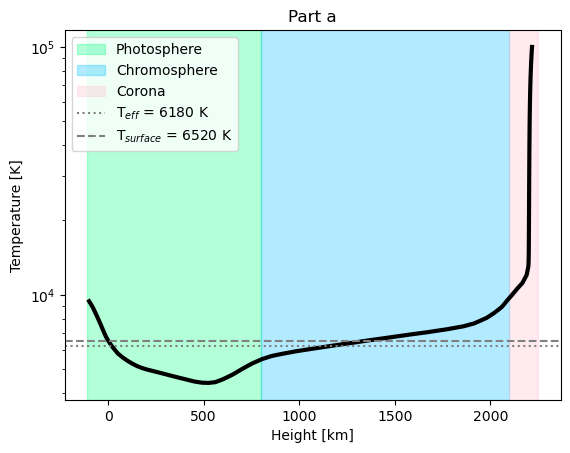

In [12]:
plt.plot(df['height'], df['temp'], color='black', linewidth=3)

plt.axvspan(-110, 800, color='springgreen', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='deepskyblue', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='pink', alpha=0.3, label='Corona')

plt.axhline(df['temp'][ind_eff], label='T$_{eff}$ = '+str(df['temp'][ind_eff])+' K', linestyle='dotted', color='grey')
plt.axhline(df['temp'][ind_surface], label='T$_{surface}$ = '+str(df['temp'][ind_surface])+' K', linestyle='dashed', color='grey')


plt.legend()
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Height [km]')
plt.ylabel('Temperature [K]')
plt.title('Part a')
plt.savefig('FinalProjectPlots/partA.pdf', dpi=300);


**Temperature vs. Height.** This figure reveals three main regimes of the Sun's atmosphere: The photosphere at heights ~0 - 800 km (green shaded region), the chromosphere at ~800 - 2100 km (blue shaded region), and the corona above ~2100 km  (pink shaded region). The dashed grey line is the surface temperature of the Sun, corresponding to $\tau$ = 1. Based on this, you can tell that the stellar surface is at height = 0.0 km. The dotted grey line is the effective temperature of the Sun, corresponding to $\tau$ = 2/3.

The photosphere of the star is the coolest with temperature ~ 6 x 10$^3$ K, the chromosphere is slightly warmer, and the star has the highest temperature in the corona where T ~ 10$^5$ K. The photosphere is the "surface" of the star, because of it's relatively cool temperature it is responsible for producing the **absorption lines** we observe in Solar spectra. The warmer chromosphere produces **emission lines** due to Hydrogen being present in this layer.



### b. Plot the distribution of the temperature as a function of the optical depth τ at 5000 A, T (τ5000 A) for this realistic Solar atmosphere model. Compare to the distribution $$T (τ ) = T_{eff} ( \frac{3}{4}τ + 1/2)^{1/4}$$ which is known as the “grey atmosphere” solution that we derived analytically in class using the Eddington-Milne approximation. Describe any differences.

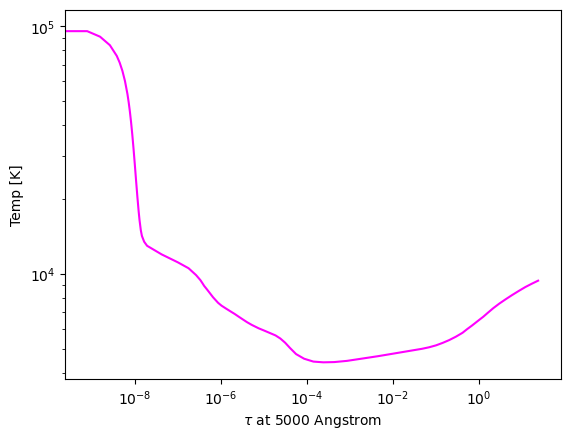

In [13]:
plt.plot(df['tau_5000A'], df['temp'], color='magenta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\u03C4$ at 5000 Angstrom')
plt.ylabel('Temp [K]');

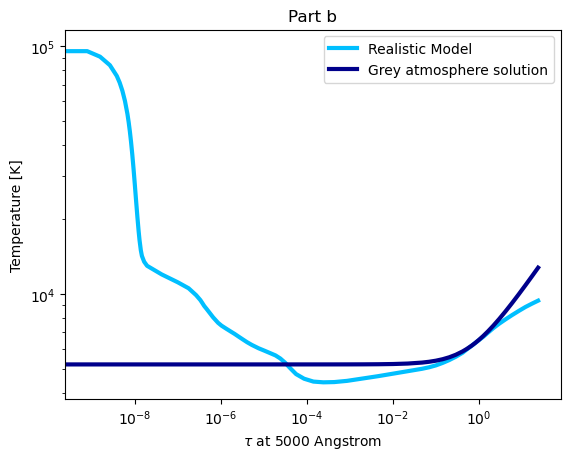

In [14]:
# Calculating the 'Grey atmosphere solution'

#T_eff = 5800 
T_eff = df['temp'][ind_eff] # effective temperature of the sun, (K)
tau = df['tau_5000A']

# The analytical equation
T_grey = T_eff * (3/4*tau + 1/2)**(1/4)  #(K)

plt.plot(df['tau_5000A'], df['temp'], color='deepskyblue', label='Realistic Model', linewidth=3)
plt.plot(df['tau_5000A'], T_grey, color='darkblue', label='Grey atmosphere solution', linewidth=3)

# plt.axhline(df['temp'][ind_eff], label='T$_{eff}$ = '+str(df['temp'][ind_eff])+' K', linestyle='dotted', color='grey')
# plt.axhline(df['temp'][ind_surface], label='T$_{surface}$ = '+str(df['temp'][ind_surface])+' K', linestyle='dashed', color='grey')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\u03C4$ at 5000 Angstrom')
plt.ylabel('Temperature [K]')
plt.legend()
plt.title('Part b')
plt.savefig('FinalProjectPlots/partB.pdf', dpi=300);



**Temperature vs. $\tau$ at 5000 $\mathring{A}$**. The realistic model is shown in light blue and the "grey atmosphere" solution is shown in dark blue. 

The 'grey atmosphere' solution is a good match to the realistic model for $\tau$ close to 1. However, the 'grey atmosphere' solution is not a good approximation for $\tau$ << 1. This reveals that the 'grey atmosphere' solution is only valid near the stellar surface.

### c. Make a plot showing the number densities of protons, electrons and hydrogen (n$_p$, n$_e$, and n$_H$, respectively) versus h. Explain the difference in behavior of these curves. You may wish to consider the complementary plots of T vs h and/or y (ionization fraction) vs h in your assessment.

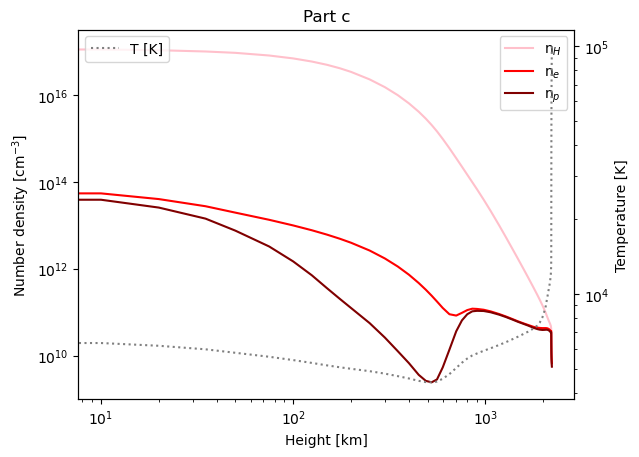

In [15]:
ax = plt.gca()
ax2 = ax.twinx()

ax.plot(df['height'], df['n_H'], label='n$_H$', color='pink')
ax.plot(df['height'], df['n_e'], label='n$_e$', color='red')
ax.plot(df['height'], df['n_p'], label='n$_p$', color='maroon')
ax.set(xlabel='Height [km]', ylabel='Number density [cm$^{-3}$]', xscale='log', yscale='log')
ax.legend()

ax2.plot(df['height'], df['temp'], linestyle='dotted', color='grey', label='T [K]')
ax2.set(xlabel='Height [km]', ylabel='Temperature [K]', xscale='log', yscale='log')
ax2.legend()

plt.title('Part c');

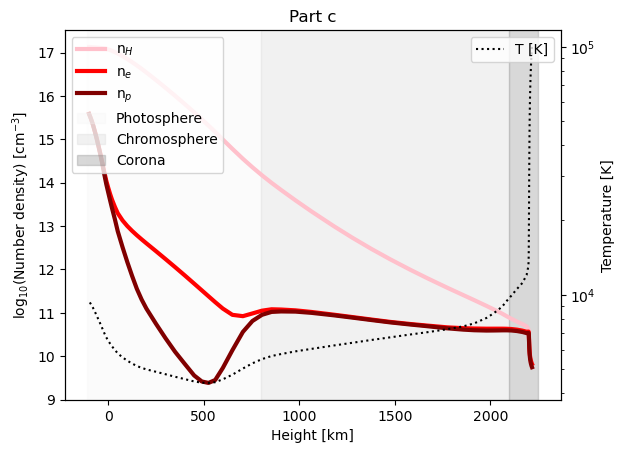

In [16]:
ax = plt.gca()
ax2 = ax.twinx()

ax.plot(df['height'], np.log10(df['n_H']), label='n$_H$', color='pink', linewidth=3)
ax.plot(df['height'], np.log10(df['n_e']), label='n$_e$', color='red', linewidth=3)
ax.plot(df['height'], np.log10(df['n_p']), label='n$_p$', color='maroon', linewidth=3)

ax.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
ax.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
ax.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')

ax.set(xlabel='Height [km]', ylabel='log$_{10}$(Number density) [cm$^{-3}$]', title='Part c')
#ax.set(xscale='log')
ax.legend(loc='upper left')

ax2.plot(df['height'], df['temp'], linestyle='dotted', color='black', label='T [K]')
ax2.set(xlabel='Height [km]', ylabel='Temperature [K]', yscale='log')
ax2.legend(loc='upper right')

plt.savefig('FinalProjectPlots/partC.pdf', dpi=300);



**log(Number density) vs. Height.** The number density of Hydrogen (pink), electrons (red), and protons (maroon) are shown, corresponding to the left axis. The dotted line, corresponding to the right axis, is the temperature profile of the Sun from part a. As determined by the temperature profiles, the shaded regions represent the photosphere, the chromosphere, and the corona respectively. 

In the photosphere, near the surface of the star, Hydrogen is dominant with ~ 10$^{17}$ n$_H$/cm$^3$. Also in the photosphere, the number density of electrons is greater than protons. The number density of Hydroden starts to decreases dramatically in the chromosphere, while the number density of electrons and protons are equal to each other. The difference between n$_H$ and n$_e$ is smaller in this region, only about 3 orders of magnitude. All three number densities then drop-off in the Corona.

### d. Plot the stratification of the density ρ vs h. Estimate the density scale height Hρ, (the distance over which the pressure drops by 1/e) defined by $$ρ = ρ_0 e^{−h/Hρ}$$ where $ρ_0$ = ρ(h = 0). Compare this scale height to the radius of the Sun and commment on the validity of the plane parallel atmosphere assumption. How many “scale heights” high is the Solar atmosphere?

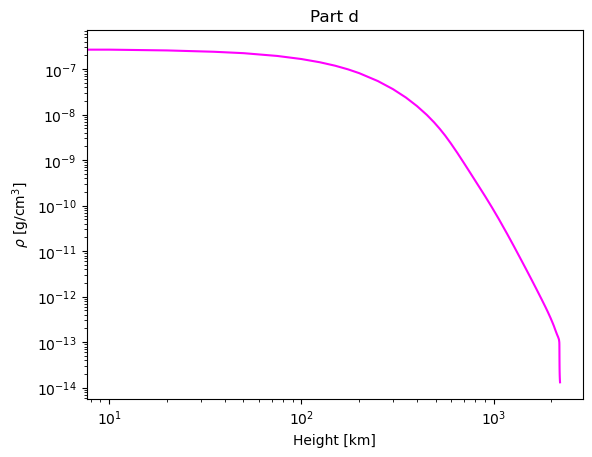

In [17]:
plt.plot(df['height'], df['rho'], color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Height [km]')
plt.ylabel('$\u03C1$ [g/cm$^3$]')
plt.title('Part d');

In [18]:
# Find the index corresponding to rho_0
ind_initial = np.where(df['height'] == 0)


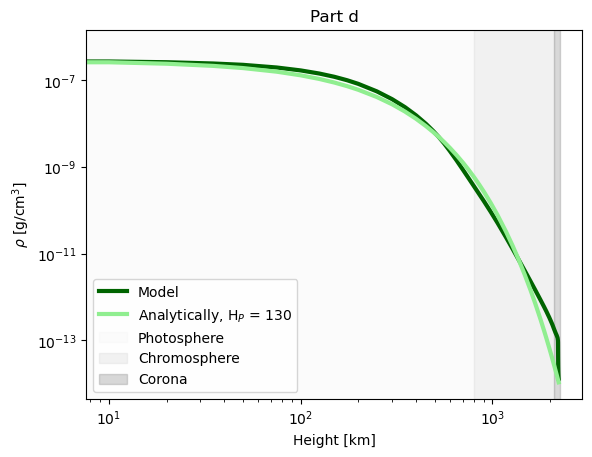

In [19]:
#Trying to figure out the scale height thing
rho0 = df['rho'][69]
H_p = 130              # Tune H_p until curve matches

rho = rho0 * np.exp(-df['height']/H_p)
#print(rho0)
plt.plot(df['height'], df['rho'], color='darkgreen', label='Model', linewidth=3)
plt.plot(df['height'], rho, color='lightgreen', label='Analytically, H$_P$ = '+str(H_p), linewidth=3)

plt.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Height [km]')
plt.ylabel('$\u03C1$ [g/cm$^3$]')
plt.title('Part d')
plt.legend()

plt.savefig('FinalProjectPlots/partD.pdf', dpi=300);


In [20]:
R_sun = 696340 #km

R_sun/H_p

#df['height'][0]/H_p

#H_p/R_sun


5356.461538461538

**Density vs. Height.** The stratifaction of density as a function of height from the reasonable model is plotted as the dark green curve. Also plotted, in light green, is the analytical solution to $\rho=\rho_0 e^{-h/H_\rho}$; Where, $ρ_0$ = ρ(h = 0), and I found the density scale height H$_\rho$ ~ 130 km is a good match to the model. As determined by the temperature profiles, the shaded regions represent the photosphere, the chromosphere, and the corona respectively.

The density is highest in the photosphere near the surface of the star, $\rho$ ~ 10$^{-7}$ g/cm$^{3}$. The density decreases exponentially in the chromosphere and reaches a minimum in the corona. To estimate the density scale height, H$_\rho$, I used the definition $\rho=\rho_0 e^{-h/H_\rho}$, where $\rho_0$ = $\rho$(h = 0). I found that H$_\rho$ ~ 130 km is a good match to the model. Comparing this scale height to the radius of the Sun, $\frac{R_\odot}{H_\rho} = 5356.26$ therefore the plane parallel assumption is valid. Moreover, the height of the Solar atmosphere is 2218.2 km which is about 17 "scale heights" high.

### e. Plot the atmospheric pressure in the Sun P vs h. Compare to the gas pressure in the Sun, Pgas, assumed to be an ideal gas. Hint: This will require you computing Pgas (starting from the ideal gas law) as a function of the stratification properties. Describe any differences between P = Ptotal that comes from the model and the P = Pgas that you computed and explain why these differences might arise.

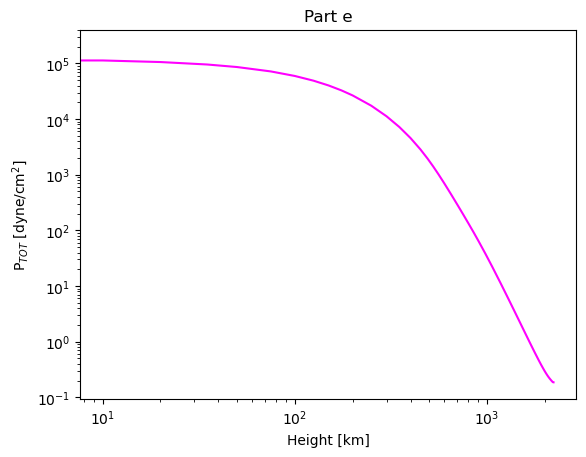

In [21]:
plt.plot(df['height'], df['Ptot'], color='magenta')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Height [km]')
plt.ylabel('P$_{TOT}$ [dyne/cm$^2$]')
plt.title('Part e');

The ideal gas law is:

$$
PV=nRT=Nk_BT
$$

$$
n_H = \frac{N}{V}
$$


$$
\boxed{
P_{gas} = n_H k_B T
}
$$
    

In [22]:
#constants
k_b = 1.3807e-16    #cgs

#P_gas = df['n_H']*k_b*df['temp']
P_gas = (df['n_H']+df['n_e'])*k_b*df['temp']


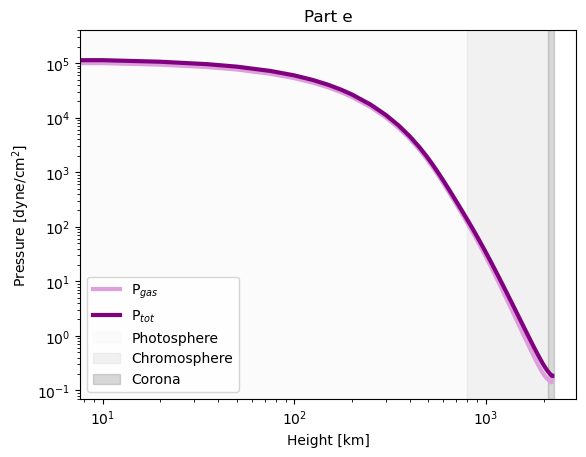

In [23]:
#plt.axhline(P_gas, label='P$_{gas}$')
plt.plot(df['height'], P_gas, color='plum', label='P$_{gas}$', linewidth=3)

plt.plot(df['height'], df['Ptot'], color='purple', label='P$_{tot}$', linewidth=3)

plt.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Height [km]')
plt.ylabel('Pressure [dyne/cm$^2$]')
plt.title('Part e')
plt.legend()

plt.savefig('FinalProjectPlots/partE.pdf', dpi=300);


**Pressure vs. Height.** Shown in the figure is the total pressure from the model (purple) aswell as the gas pressure calculated from the ideal gas law (light purple). As determined by the temperature profiles, the shaded regions represent the photosphere, the chromosphere, and the corona respectively. 

Overall, P$_{gas}$ is a good match to P$_{tot}$, with small deviations near the surface and larger deviations at the very top of the chromosphere and the corona. The deviations probably occur because there are other things that can contribute to pressure such as radiation pressure and turbulence pressure, which I did not take into account for my calculation of P$_{gas}$. 

### f. Plot β vs h from the Sun’s atmospheric model, where β = Pgas/Ptotal. How does this compare to your answer and plot in part e? What could explain these differences?

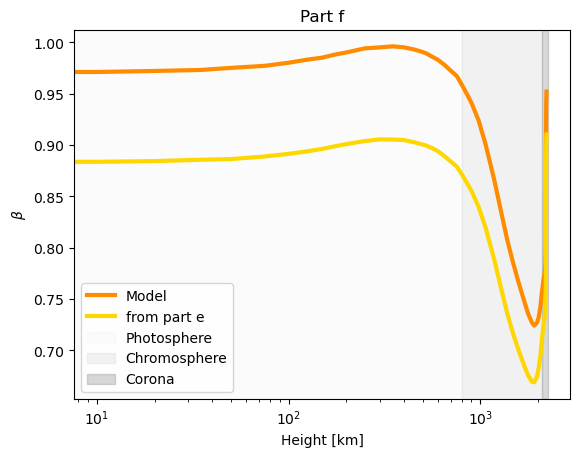

In [24]:
plt.plot(df['height'], df['beta'], color='darkorange', label='Model', linewidth=3)
plt.plot(df['height'], P_gas/df['Ptot'], color='gold', label='from part e', linewidth=3)

plt.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')

#plt.yscale('log')
plt.xscale('log')

plt.xlabel('Height [km]')
plt.ylabel(r'$\beta$')
plt.title('Part f')
plt.legend()

plt.savefig('FinalProjectPlots/partF.pdf', dpi=300);


**Beta vs. Height.** $\beta = \frac{P_{gas}}{P_{tot}}$ from the realistic model (orange) and $\beta$ calculated using my P$_{gas}$ from part e (yellow). As determined by the temperature profiles, the shaded regions represent the photosphere, the chromosphere, and the corona respectively.

This further shows that P$_{gas}$ deviates from P$_{tot}$ slightly in the photosphere, and the difference is most dramatic in the chromosphere. The differences likely arise because there are other contributers to pressure, especially in the Corona, such as radiation pressure and turbulent pressure. The difference between the model $\beta$ and my analytically calculated $\beta$ likely arise because of the ideal gas law assumption not being totally valid. 

### g. Now investigate the Ptotal vs m relationship, where m is the mass column density in units of g/cm2. You should find that it is linear with Ptotal = m × g, where g is the surface gravity. What value of the Sun’s surface gravity was assumed in the code that produced the atmospheric model?

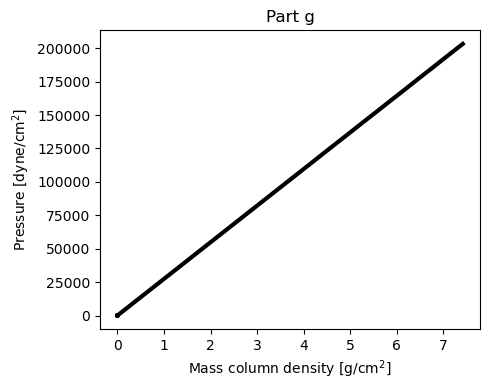

In [25]:
plt.figure(figsize=(5,4))
plt.plot(df['colDen'], df['Ptot'], color='black', linewidth=3)

plt.xlabel('Mass column density [g/cm$^2$]')
plt.ylabel('Pressure [dyne/cm$^2$]')
plt.title('Part g')

plt.tight_layout()
plt.savefig('FinalProjectPlots/partG.pdf', dpi=300);

In [26]:
#What value of g was assumed in the code? -> slope of the line
g = (df['Ptot'][79]-df['Ptot'][0])/(df['colDen'][79]-df['colDen'][0])
g

27396.52150009791

In [27]:
np.log10(g)

4.437695424527903

**Pressure vs. Mass Column Density.** Pressure increases linearly with mass column density since P$_{tot}$ = m x g. The slope of this line reveals the value of g assumed in the model, so g ~ 27396.52 cm/s$^2$.

### h. One assumption in the model is of complete mixing, i.e., the same proportion of each element is mixed in at all heights. Check this by plotting the ratio of the hydrogen mass density to the total mass density against height. Then add helium via an appropriate helium-to-hydrogen ratio using their relative abundance and mass ratios – N(He)/N(H) = 0.1, m(He)/m(H) = 3.97 – and estimate the fraction of the total mass density made up by the remaining elements in the model mix (i.e. the “metals”).

In [28]:
mu_H = 1.0
m_H = 1.6733e-24

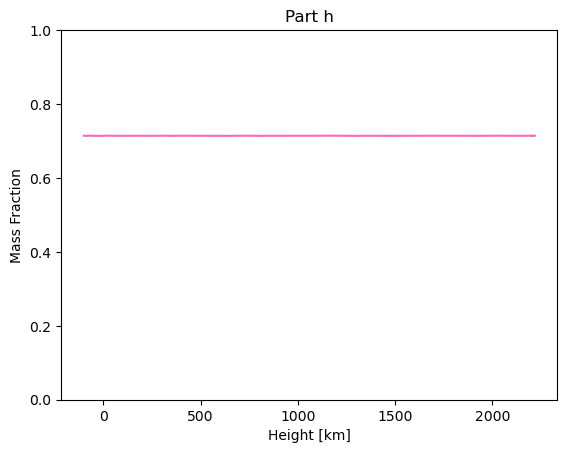

In [29]:
mu_H = 1.0
m_H = 1.6733e-24
mass_H = mu_H*m_H
rho_H = df['n_H']*mass_H

plt.plot(df['height'], rho_H/df['rho'], color='hotpink')

#plt.plot(df['height'], df['n_H']*mu*m_H/df['rho'], color='hotpink')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim(0,1)
plt.xlabel('Height [km]')
plt.ylabel('Mass Fraction')
plt.title('Part h');



In [30]:
frac_H_avg = np.mean(rho_H/df['rho'])
frac_H_avg

0.7141324452997277

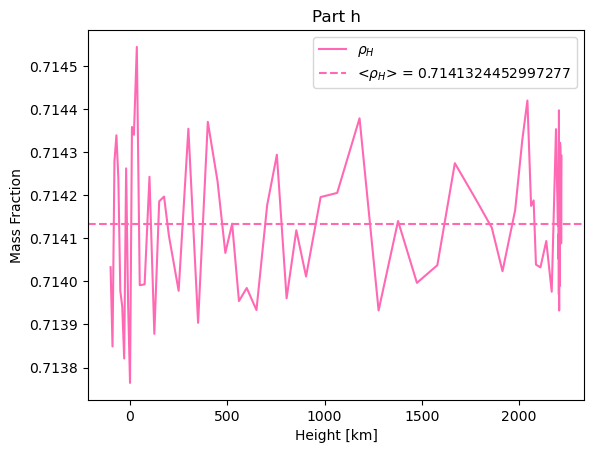

In [31]:
plt.plot(df['height'], rho_H/df['rho'], color='hotpink', label=r'$\rho_H$')
plt.axhline(np.mean(frac_H_avg), color='hotpink', linestyle='dashed', label=r'<$\rho_H$> = '+str(frac_H_avg))

# plt.xscale('log')
# plt.yscale('log')

#plt.ylim(0,1)
plt.xlabel('Height [km]')
plt.ylabel('Mass Fraction')
plt.title('Part h')
plt.legend();

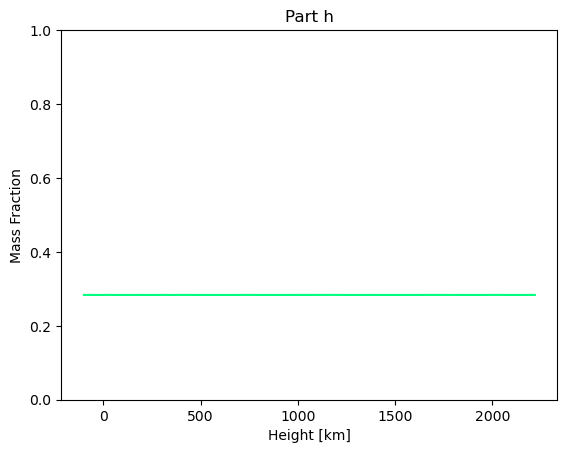

In [32]:
#Add Helium

#Helium-to-Hydrogen ratios
n_He = df['n_H']*0.1
mass_He = mass_H*3.97
rho_He = n_He*mass_He

# m_He = df['rho']*3.97
#mu_He = 4
# mass_He = 6.6464731e-24 



plt.plot(df['height'], rho_He/df['rho'], color='springgreen')
plt.ylim(0,1)
# plt.yscale('log')

plt.xlabel('Height [km]')
plt.ylabel('Mass Fraction')
plt.title('Part h');

In [33]:
frac_He_avg = np.mean(rho_He/df['rho'])
frac_He_avg

0.28351058078399205

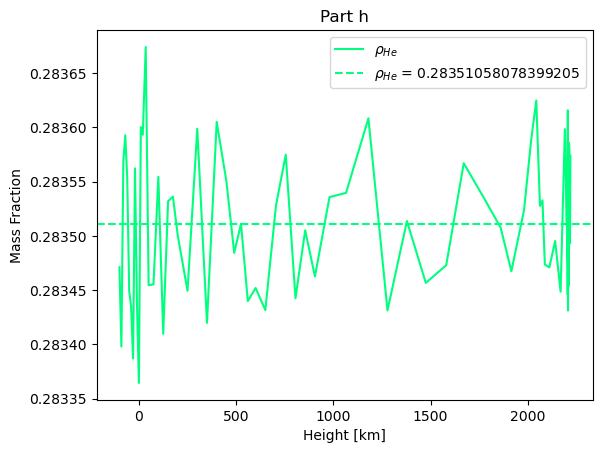

In [34]:
#Add Helium

#Helium-to-Hydrogen ratios
n_He = df['n_H']*0.1
mass_He = mass_H*3.97
rho_He = n_He*mass_He


plt.plot(df['height'], rho_He/df['rho'], color='springgreen', label=r'$\rho_{He}$')
plt.axhline(frac_He_avg, linestyle='dashed', color='springgreen', label=r'$\rho_{He}$ = '+str(frac_He_avg))
#plt.ylim(0,1)
# plt.yscale('log')

plt.xlabel('Height [km]')
plt.ylabel('Mass Fraction')
plt.title('Part h')
plt.legend();

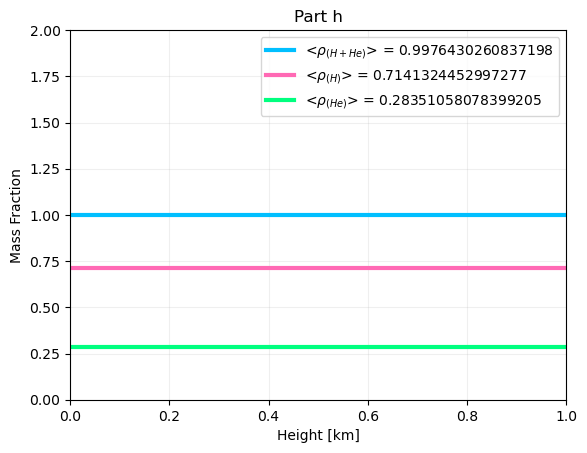

In [35]:
#Add Helium

#Helium-to-Hydrogen ratios
n_He = df['n_H']*0.1
m_He = df['rho']*3.97

plt.axhline(frac_H_avg+frac_He_avg, color='deepskyblue', label=r'<$\rho_{(H+He)}$> = '+str(frac_H_avg+frac_He_avg), linewidth=3)
plt.axhline(frac_H_avg, color='hotpink', label=r'<$\rho_{(H)}$> = '+str(frac_H_avg), linewidth=3)
plt.axhline(frac_He_avg, color='springgreen', label=r'<$\rho_{(He)}$> = '+str(frac_He_avg), linewidth=3)

plt.ylim(0,2.0)
plt.xlabel('Height [km]')
plt.ylabel('Mass Fraction')
plt.title('Part h')
plt.legend()
plt.grid(alpha=0.2);

**Estimating the mass fraction of metals in the sun**

$$
<\rho_{total}>=100\%
$$

$$
<\rho_{total}>=<\rho_{H}>+<\rho_{He}>+<\rho_{metals}>
$$

$$
<\rho_{metals}>=<\rho_{total}>-<\rho_{H}>-<\rho_{He}>
$$


In [36]:
frac_metals_avg = 1.0 - (frac_H_avg+frac_He_avg)
frac_metals_avg

0.002356973916280203

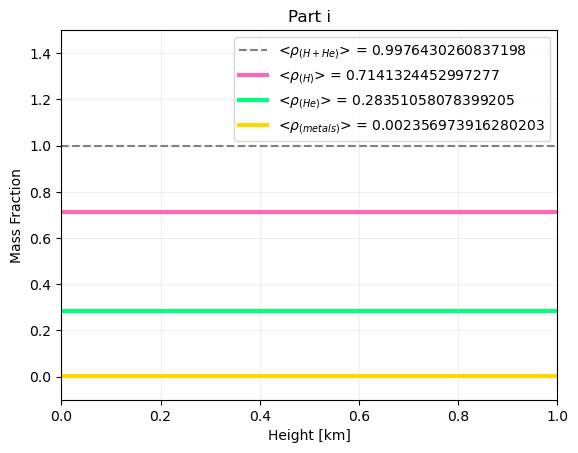

In [37]:
frac_metals_avg = 1.0 - (frac_H_avg+frac_He_avg)
total_fraction = frac_H_avg+frac_He_avg+frac_metals_avg


plt.axhline(frac_H_avg+frac_He_avg, color='grey', label=r'<$\rho_{(H+He)}$> = '+str(frac_H_avg+frac_He_avg), linestyle='dashed')
plt.axhline(frac_H_avg, color='hotpink', label=r'<$\rho_{(H)}$> = '+str(frac_H_avg), linewidth=3)
plt.axhline(frac_He_avg, color='springgreen', label=r'<$\rho_{(He)}$> = '+str(frac_He_avg), linewidth=3)
plt.axhline(frac_metals_avg, label=r'<$\rho_{(metals)}$> = '+str(frac_metals_avg), color='gold', linewidth=3)
#plt.axhline(total_fraction, linestyle='dashed', color='black')

plt.ylim(-0.1,1.50)

plt.legend()
plt.grid(alpha=0.2)

plt.xlabel('Height [km]')
plt.ylabel('Mass Fraction')
plt.title('Part i');

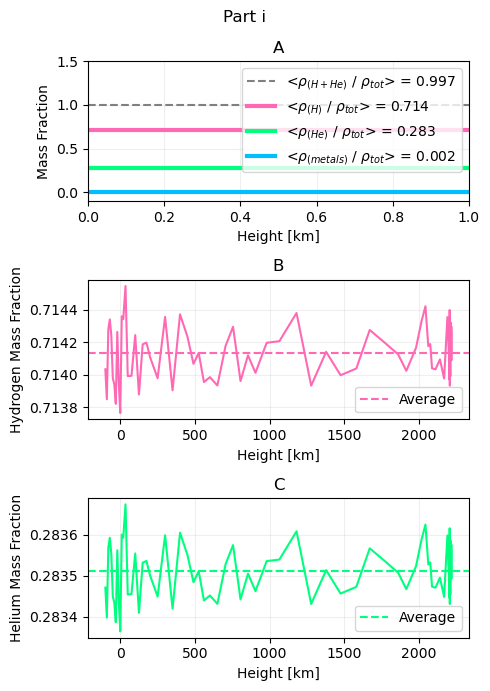

In [38]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(5,7))

ax1.axhline(frac_H_avg+frac_He_avg, color='grey', label=r'<$\rho_{(H+He)}$ / $\rho_{tot}$> = '+str(frac_H_avg+frac_He_avg)[:5], linestyle='dashed')
ax1.axhline(frac_H_avg, color='hotpink', label=r'<$\rho_{(H)}$ / $\rho_{tot}$> = '+str(frac_H_avg)[:5], linewidth=3)
ax1.axhline(frac_He_avg, color='springgreen', label=r'<$\rho_{(He)}$ / $\rho_{tot}$> = '+str(frac_He_avg)[:5], linewidth=3)
ax1.axhline(frac_metals_avg, label=r'<$\rho_{(metals)}$ / $\rho_{tot}$> = '+str(frac_metals_avg)[:5], color='deepskyblue', linewidth=3)
ax1.set(ylim=(-0.1,1.5))
ax1.legend()
ax1.grid(alpha=0.2)
ax1.set(xlabel='Height [km]', ylabel='Mass Fraction', title='A')

ax2.plot(df['height'], rho_H/df['rho'], color='hotpink')
ax2.axhline(np.mean(frac_H_avg), color='hotpink', linestyle='dashed', label='Average')
ax2.legend()
ax2.grid(alpha=0.2)
ax2.set(xlabel='Height [km]', ylabel='Hydrogen Mass Fraction', title='B')


ax3.plot(df['height'], rho_He/df['rho'], color='springgreen')
ax3.axhline(frac_He_avg, linestyle='dashed', color='springgreen', label='Average')
ax3.legend()
ax3.grid(alpha=0.2)
ax3.set(xlabel='Height [km]', ylabel='Helium Mass Fraction', title='C')


plt.suptitle('Part i')
plt.tight_layout()

plt.savefig('FinalProjectPlots/partH.pdf', dpi=300);


**Mass Fraction vs. Height.** Top panel: Average molecular mass fraction of Hydrogen (pink), Helium (green), and metals (blue) in the Sun assuming complete mixing. The grey dashed line represents the sum of the molecular mass fraction of Hydrogen and Helium, note that the sum is slightly less than 1.0. Middle panel: Zoom-in of panel a showing the molecular mass fraction of Hydrogen in the Sun aswell as the average (dashed line). Bottom panel: Zoom-in of panel a showing the molecular mass fraction of Helium in the Sun aswell as the average (dashed line). The molecular mass fractions of each element are relatively constant throughout the atmosphere because complete mixing was assumed. 

The average molecular mass fractions in the Sun are as follows; 74.1% Hydrogen and 28.3% Helium. The molecular mass fractions of each element are relatively constant throughout the atmosphere because complete mixing was assumed. Based on these abundances I was able to calculate the average molecular mass fraction of metals since $<\rho_{H} / \rho_{tot}>+<\rho_{He} / \rho_{tot}>+<\rho_{metals} / \rho_{tot}> = 100\%$. I estimate the average mass fraction of metals in the Sun to be 0.2%.

### i. Plot vturb vs h. What does this plot reflect about conditions in the atmosphere? The pressure from this turbulence can be found as Pturb =1/2ρv2 turb; how does it compare to other pressure terms discussed above?

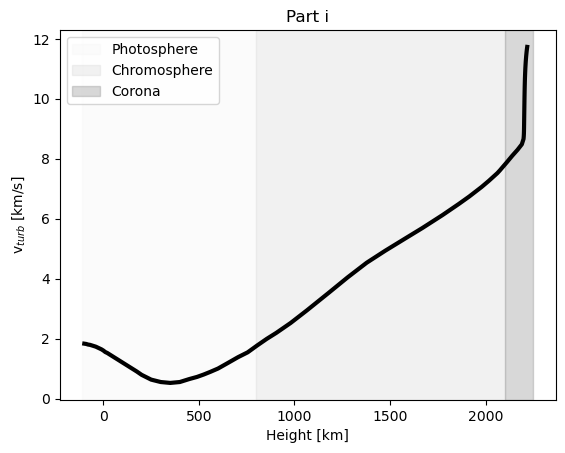

In [39]:
plt.plot(df['height'], df['vTurb'], color='black', linewidth=3)

plt.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')

# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('Height [km]')
plt.ylabel('v$_{turb}$ [km/s]')
plt.title('Part i')
plt.legend()

plt.savefig('FinalProjectPlots/partI.pdf', dpi=300);


**Turbulent Velocity vs. Height.** The turbulent velocity profile of the solar atmosphere. As determined by the temperature profiles, the shaded regions represent the photosphere, the chromosphere, and the corona respectively. 

The turbulent velocity is the smallest in the photosphere, ~2 km/s, it then increases steadily in the chromosphere to ~8 km/s. The turbulent velocity shoots up to ~12 km/s in the corona at the very top of the atmosphere. This reveals that turbulence increases as you go outwards from the "surface" of the star.

Turbulent velocity is related to turbulent pressure,
 
$$
P_{turb} = \frac{1}{2}\rho v_{turb}^2
$$

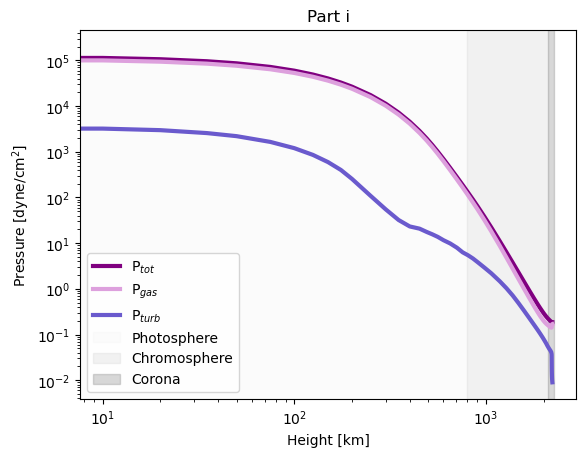

In [40]:
# Compare pressure terms
P_turb = 1/2 * df['rho'] * (df['vTurb']*100000
                           )**2

plt.plot(df['height'], df['Ptot'], label='P$_{tot}$', color='purple', linewidth=3)
plt.plot(df['height'], P_gas, label='P$_{gas}$', color='plum', linewidth=3)
plt.plot(df['height'], P_turb, label='P$_{turb}$', color='slateblue', linewidth=3)

plt.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left')

plt.xlabel('Height [km]')
plt.ylabel('Pressure [dyne/cm$^2$]')
plt.title('Part i')

plt.savefig('FinalProjectPlots/partI_2.pdf', dpi=300);



**Pressure vs. Height.** The total pressure (purple), gas pressure from part e (light purple), and turbulent pressure (blue). As determined by the temperature profiles, the shaded regions represent the photosphere, the chromosphere, and the corona respectively. 

In all regions of the atmosphere, the gas pressure is dominating and turbulent pressure is more that 1 order of magnitude smaller. 

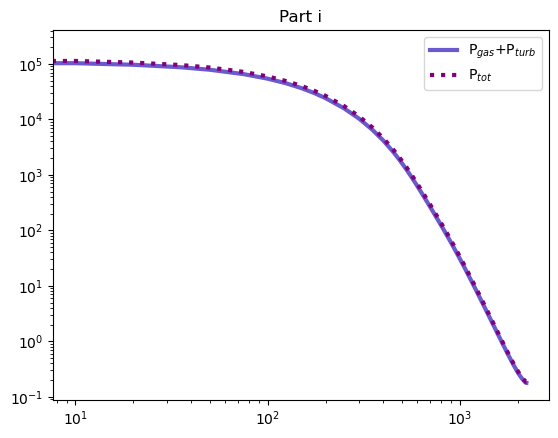

In [41]:
#P_gas+P_turb = P_tot?

plt.plot(df['height'], P_gas+P_turb, color='slateblue', label='P$_{gas}$+P$_{turb}$', linewidth=3)
#plt.plot(df['height'], P_gas, linestyle='dashed')
plt.plot(df['height'], df['Ptot'], color='purple', linestyle='dotted', label='P$_{tot}$', linewidth=3)

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.title('Part i');

# Part II

**Part II** - Now that we have the physical parameters and their variation in the
atmosphere understood, let’s start to consider what we can actually observe.
Let’s first examine the broad solar spectrum (or spectral energy distribution)
between 0.2-5μm. Find the file solspect.dat.txt, taken from Allen (1976) in
your Canvas. There are four different quantities, both the astrophysical flux
and the radially emergent intensity, each given with and without the inclusion
of spectral lines (units are in cgs).

In [42]:
# Read in the table
import pandas as pd
df = pd.read_csv('solspect.dat.txt', skiprows=14, sep='\s+', 
            names=['wavelength',                     # Wavelength [mm]
                   'flux',                           # Astrophysical flux at the solar surface with spectral irregularities smoothed
                   'flux_prime',                     # Astrophysical flux at the solar surface for the continuum between lines
                   'intensity',                      # Radially emergent intensity at the solar surface with spectral irregularities smoothed
                   'intensity_prime'])               # Radially emergent intensity at the solar surface for the continuum between lines 


In [43]:
# Visually inspect the table
display(df)

,wavelength,flux,flux_prime,intensity,intensity_prime
0,0.20,0.0200,0.0400,0.0300,0.0400
1,0.22,0.0700,0.1100,0.1400,0.2000
2,0.24,0.0900,0.2000,0.1800,0.3000
3,0.26,0.1900,0.4000,0.3700,0.5000
4,0.28,0.3500,0.7000,0.5900,1.1900
5,0.30,0.7600,1.3600,1.2100,2.1500
6,0.32,1.1000,1.9000,1.6100,2.8300
7,0.34,1.3300,2.1100,1.9100,3.0100
8,0.36,1.4600,2.3000,2.0300,3.2000
9,0.37,1.5700,2.5000,2.3300,3.6200


### k. Plot the four columns against wavelength, all on the same Figure. Check that the continuum intensity peak is reached at λ = 0.41μm.

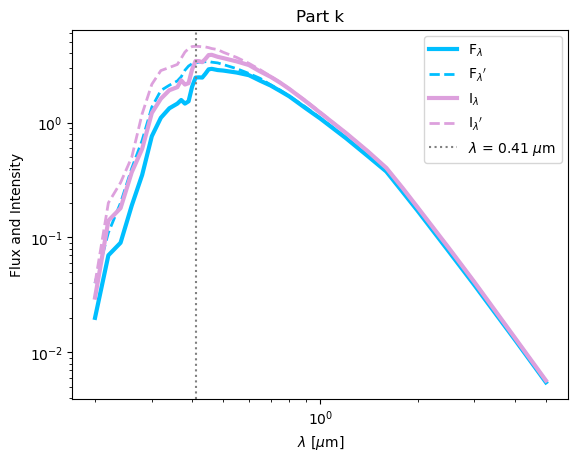

In [44]:
import matplotlib.pyplot as plt

plt.plot(df['wavelength'], df['flux'], label=r'F$_{\lambda}$', color='deepskyblue', linewidth=3)
plt.plot(df['wavelength'], df['flux_prime'], label=r'F$_{\lambda}$$^\prime$', color='deepskyblue', linestyle='dashed', linewidth=2)
plt.plot(df['wavelength'], df['intensity'], label=r'I$_{\lambda}$', color='plum', linewidth=3)
plt.plot(df['wavelength'], df['intensity_prime'], label=r'I$_{\lambda}$$^\prime$', color='plum', linestyle='dashed', linewidth=2)

#Check that the continuum intensity peak is at 0.41 micron
plt.axvline(0.41, color='grey', linestyle='dotted', label=r'$\lambda$ = 0.41 $\mu$m')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel('Flux and Intensity')
plt.title('Part k')

plt.savefig('FinalProjectPlots/partK.pdf', dpi=300);




**Flux and Intensity vs. Wavelength** Astrophysical flux (F$_{\lambda}$, in blue) and emergent intensity (I$_{\lambda}$, in green) are shown as a function of wavelength. Also shown, as dashed curves, are the continuum flux and continuum emergent intensity. The emergent intensity peaks at $\lambda$ = 0.41 $\mu$m.

To proceed with our modelling we are going to assume a plane-parallel atmo-
sphere that consists of two parts: (i) a semi-infinite lower part at temperature
Tl that lies below (ii) an upper part at temperature Tu. We will also assume a
source function Sλ = Bλ(T ). The surface of the atmosphere at optical depth
τ = 0 is at the top of the upper part, and the optical depth of the upper part
is τu.

The idea of this so-called Schuster-Schwarzschild model, is that the continu-
ous radiation, without spectral lines, is emitted by the semi-infinite lower layer
having Tl, and irradiates a separate upper layer with intensity Iλ(0) = Bλ(Tl).


The upper layer with Tu sits as a shell around the star, and causes attenua-
tion as well as local emission only at the wavelengths of spectral lines. The shell
is thus made up exclusively of line-causing atoms or ions. The shell may be opti-
cally thin or thick at the line wavelength, depending on the atom concentration
which is expressed as a density or an abundance.

### l. Solve (analytically) the radiative transfer equation of this atmosphere to show that the emergent intensity I(τ = 0, θ) as a function of viewing angle θ can be expressed as:

$$
λ = B_λ(T_l)e^{−τ_λ} + B_λ(T_u)(1 − e^{−τ_λ} )
$$

**Solution:**

Starting with the equation for radiative transfer,
$$
\frac{dI}{d\tau} = S_{\lambda} - I_{\lambda}
$$
multiply both sides by the attenuation factor, e$^{-\tau}$,
$$
\frac{dI}{d\tau} e^{-\tau_{\lambda}} = (S_{\lambda} - I_{\lambda})e^{-\tau_{\lambda}}
$$
by applying seperation of variables this leads to,
$$
I_{\lambda} = I_{\lambda}(0)e^{-\tau_{\lambda}} + \int_{0}^{\tau} S_{\lambda}e^{-\tau_{\lambda}} d\tau_{\lambda}
$$
integrating results in,
$$
I_{\lambda} = I_{\lambda}(0)e^{-\tau_{\lambda}} + S_{\lambda}(1-e^{-\tau_{\lambda}})
$$
and we know that I$_{\lambda}$(0) = B$_{\lambda}$(T$_L$) and S$_{\lambda}$ = B$_{\lambda}$(T$_U$), where B$_{\lambda}$(T) is the Planck function. Therefore,


$$
\boxed{I_{\lambda} = B_{\lambda}(T_L) e^{-\tau_{\lambda}} + B_{\lambda}(T_U)(1-e^{-\tau_{\lambda}})}
$$


### m. Code a function that outputs B$_λ$ for any input temperature T using the Planck formula. Test it for some temperatures relevant to stellar atmospheres

**Planck Function:**

$$
B_{\lambda}(T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_BT}}-1}
$$


In [45]:
def Planck(T, wavelength_array):
    
    #constants in CGS:
    h = 6.6260755e-27     #cgs, Planck constant
    k = 1.380658e-16      #cgs, Boltzmann constant
    c = 2.99792458e10     #cgs, speed of light
    
    first = (2 * h * c**2)/wavelength_array**5
    exp = np.exp((h * c) / (wavelength_array * k * T))
    B_lambda = first * 1/(exp - 1)
    return B_lambda
 

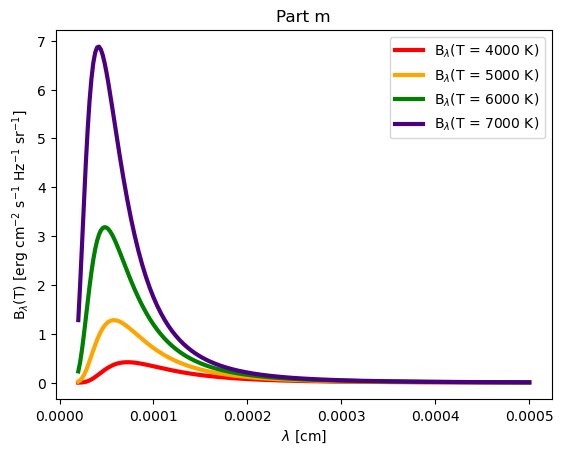

In [46]:
wav = np.arange(2e-5, 5e-4, 0.000002)

T = 4000
B = Planck(T, wav)
plt.plot(wav, B/10**14, label=r'B$_{\lambda}$(T = '+str(T)+' K)', color='red', linewidth=3)
T = 5000
B = Planck(T, wav)
plt.plot(wav, B/10**14, label=r'B$_{\lambda}$(T = '+str(T)+' K)', color='orange', linewidth=3)
T = 6000
B = Planck(T, wav)
plt.plot(wav, B/10**14, label=r'B$_{\lambda}$(T = '+str(T)+' K)', color='green', linewidth=3)
T = 7000
B = Planck(T, wav)
plt.plot(wav, B/10**14, label=r'B$_{\lambda}$(T = '+str(T)+' K)', color='indigo', linewidth=3)


plt.xlabel(r'$\lambda$ [cm]')
plt.ylabel(r'B$_{\lambda}$(T) [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]')
plt.title('Part m')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

plt.savefig('FinalProjectPlots/partM.pdf', dpi=300);



**Planck Formula.** The resulting Planck function, B$_{\lambda}$, for different temperatures relevant to stellar atmsopheres: 10000 K, 8000 K, 6000 K, 400
0 K. The hottest object is brightest at all wavelengths.

### n. Fit your Planck function to the continuum solar spectrum from above. What value of T do you infer for the Sun?

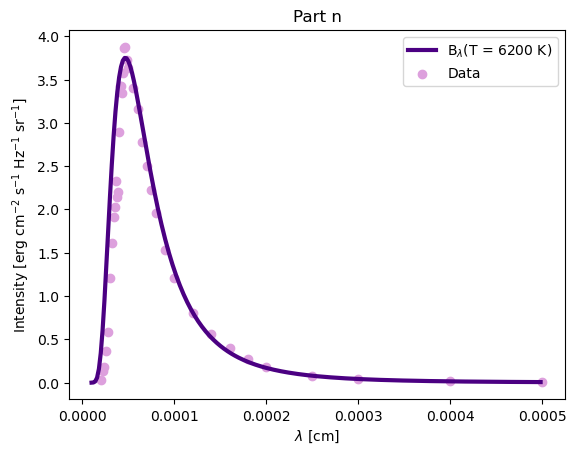

In [47]:
wav = np.arange(1e-5, 5e-4, 0.000002) #wavelength range [cm]

T = 6200 #free parameter, temperature [K]

B = Planck(T, wav)
plt.plot(wav, B/10**14, label=r'B$_{\lambda}$(T = '+str(T)+' K)', color='indigo', linewidth=3)

plt.scatter(df['wavelength']/10000, df['intensity'], label='Data', color='plum')


plt.xlabel(r'$\lambda$ [cm]')
plt.ylabel(r'Intensity [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]')
plt.title('Part n')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

plt.savefig('FinalProjectPlots/partN.pdf', dpi=300);


**Solar Blackbody Spectrum.** The blackbody spectrum of a 6200 K object is a good fit to the Solar intensity data. This is slightly hotter than the reported temperature of the Sun which is closer to 5772 K.


Now regarding the line opacity and spectral lines, the two primary considerations are: how much of any given element there is, and then, for a given
temperature of the gas, how the electrons are distributed in the different energy
levels (and thus available to move to other energy levels). For this we need both
the Saha equation, telling us about the ionization state, and the Boltzmann
equation, telling us about the excitation states for the bound electrons.

### o. Code each of the Boltzman and Saha functions, that use the relevant parameters of the Na I D1 line.

In [48]:
def Boltzmann(g_u, g_l, E_u, E_l, T):
    
    #constants:
    k = 1.380658e-16 #cgs
    
    #the equation:
    levels = (g_u/g_l)*np.exp(-(E_u - E_l)/(k*T))
    return levels

In [49]:
# from the table:
g_u = 4.0
g_l = 2.0
E_u = 2.1044/6.242e+11 #erg
E_l = 0.0
T = 6000 #K, approximately the temperature of the sun

boltz = Boltzmann(g_u, g_l, E_u, E_l, T)
boltz

0.03416349833672811

In [50]:
# def Saha(U_II, U_I, T, chi_i):
    
#     #constants:
#     k = 1.380658e-16      #cgs
#     P_e = 200             #dyne cm^-2, this is what I used in hw 1 for a constant electron pressure
#     m_e = 9.1093837e-28   #g
#     h = 6.6260755e-27     #cgs
    
#     first = (2*k*T*U_II)/(P_e*U_I)
#     second = ((2*np.pi*m_e*k*T)/h**2)**(2/3)
#     third = np.exp(-chi_i/(k*T))
#     saha = first*second*third
    
#     return saha

In [51]:
def Saha(U_II, U_I, T, chi_i, n_e):
    
    #constants:
    k = 1.380658e-16      #cgs
    P_e = 200             #dyne cm^-2, this is what I used in hw 1 for a constant electron pressure
    m_e = 9.1093837e-28   #g
    h = 6.6260755e-27     #cgs
#     n_e = dn['n_e']
    
    first = (2*U_II)/(n_e*U_I)
    second = ((2*np.pi*m_e*k*T)/h**2)**(3/2)
    third = np.exp(-chi_i/(k*T))
    saha = first*second*third
    
    return saha

In [52]:
ionization_energy_Na = 5.13908/6.242e+11 #erg
U_II = 6.0
U_I = 1.0
T = 6000 #K, approximately the temperature of the sun
n_e = 2.779E+13

saha = Saha(U_II, U_I, T, ionization_energy_Na, n_e)
saha

23394.47603173244

In [53]:
def Saha_Boltzmann(boltz_pop, saha_pop):
     
    saha_boltzmann = 1/(boltz_pop+1) * 1/(1+saha_pop)
    
    return saha_boltzmann

In [54]:
nl_nE = Saha_Boltzmann(boltz, saha)
nl_nE

4.133128509343538e-05

### p. Now code up a function alpha_NaD using the formula for α$_{λo}$ in Equation 2 above, taking the Solar Na abundance to be ANa = 1.8 × 10$^{−6}$.

In [55]:
def alpha_NaD(saha_boltzmann_dist, wavelength, oscillator_strength, T, n_H):
    
    #constants:
    e = 4.8032e-10        #cgs, electron charge
    m_e = 9.1093837e-28   #g
    c = 2.99792458e10     #cgs, speed of light
#     n_H = 15.0            #? seems like a reasonable number based in Part I of project
#     n_H = dn['n_H']
    A_Na = 1.8e-6         #given Solar Na abundance
    h = 6.6260755e-27     #cgs
    k = 1.380658e-16      #cgs

    #equation:
    first = ((np.sqrt(np.pi)*e**2)/(m_e*c)) * wavelength**2/c * saha_boltzmann_dist * n_H * A_Na
    second = oscillator_strength*(1-np.exp(-h*c/(wavelength*k*T)))
    alpha = first*second
    
    return alpha
    

In [56]:
wave = 5889.95/1e+8 #cm
f_lu = 0.641        #oscillator strength
T = 6000
# n_H = dn['n_H']
n_H = 1.027E+17

alpha_NaD(nl_nE, wave, f_lu, T, n_H)

8.341377090067549e-15

### q. Plot your linear extinction coefficient as a function of temperature, just to see how it behaves. Over what range of temperatures might we expect to see Na I D absorption lines?



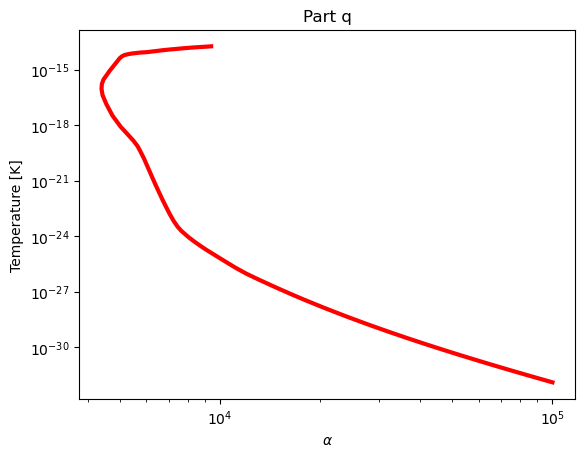

In [57]:
#important values
g_u = 4.0
g_l = 2.0
E_u = 2.1044/6.242e+11 #erg
E_l = 0.0
ionization_energy_Na = 5.13908/6.242e+11 #erg
U_II = 6.0
U_I = 1.0
wave = 5889.95/1e+8 #cm
f_lu = 0.641        #oscillator strength
T = dn['temp']
n_H = dn['n_H']

#calculate Boltzmann, Saha, and Boltzmann-Saha as a function of temperature
boltz = Boltzmann(g_u, g_l, E_u, E_l, T)
saha = Saha(U_II, U_I, T, ionization_energy_Na, dn['n_e'])
nl_nE = Saha_Boltzmann(boltz, saha)
alpha = alpha_NaD(nl_nE, wave, f_lu, T, n_H)

plt.plot(T, alpha, color='red', linewidth=3)
# plt.plot(alpha, dn['height'], color='red', linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Temperature [K]')
plt.xlabel(r'$\alpha$')
plt.title('Part q')

plt.savefig('FinalProjectPlots/partQ.pdf', dpi=300);


**Extinction coefficient vs. temperature.** The extinction coefficient, $\alpha_{\lambda0}$, increases as temperature decreases.  I would expect to see Na D1 absorption lines for temperatures ranging from 1000 K - 10000 K, where $\alpha_{\lambda0}$ is largest. 

The extinction coefficient is largest at temperatures less than 10000 K, corresponding to the photosphere and chromosphere regions of the star. Indicating that the "surface" of the star may be easiest to probe.

### r. Use the code below to plot the Voigt function V (a, u) for a = 0.1 and u = −10 to u = +10. Now vary the value of a between a = 1 and a = 0.001 to see the effect of this parameter. Use a log scale to inspect the far wings of the profile. Explain what you see.

You could imagine generalizing some of the steps above, by having a function
for α that takes as input λo and flu, as well as outputs from the Saha-Boltzmann
function, and an element abundance. But sometimes it is best to not be too
clever, too fast, when developing new code.

With αλo now in hand, we have an easy path to τλo . But you will recall
from above that the total prescription for optical depth of an absorption line is
τ$_λ$ = τ$_{λ_o}$ φ(λ − λ$_o$). So we have just one more function to specify!

The φ(λ − λo) component is the “broadening profile” of the absorption line.
“Lines” are not delta functions, but have some broadening to them. The opacity τλ varies not just over broad wavelength ranges, but also on small scales, indeed
across individual spectral lines. For the bound-bound component of the opacity,
when atoms absorb or emit a photon due to a valence electron jumping between
two bound energy levels with ∆E = hc/λo, the effect is spread out in wavelength
around the line center λo. This line broadening is due to various effects that
we learnt about in class, but for practical purposes here, we just need to know
how to describe the distribution in wavelength. You can use a Gaussian, but
usually a Voigt profile provides a better match and greater understanding. We
thus define,

$$
\phi(\lambda - \lambda_0) = \frac{1}{\sqrt{\pi(\Delta\lambda_D)}} V(a,u)
$$

Where $\Delta\lambda_0$ is the Doppler width, $\Delta\lambda_0 = (\lambda_0/c) \sqrt{2kT/m+v^2_{turb}}$. The
Voigt function V (a, u) is defined as a convolution, but can be approximated with the following python code:

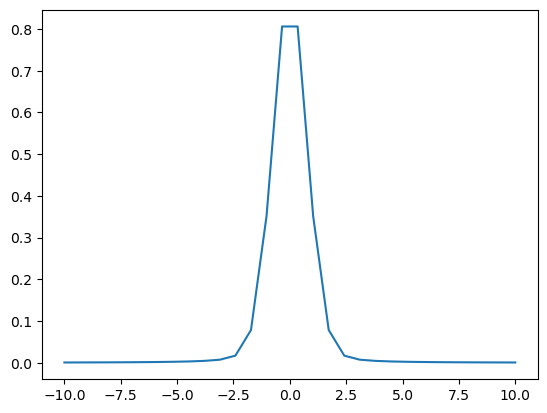

In [58]:
import scipy 

def Voigt(a, u):
    I = scipy.integrate.quad(lambda y: np.exp(-y**2)/(a**2 + (u - y)**2),-np.inf, np.inf)[0]
    return (a/np.pi)*I

a = 0.1
u_range = np.linspace(-10,10,30)
plt.plot(u_range, [Voigt(a, u) for u in u_range])

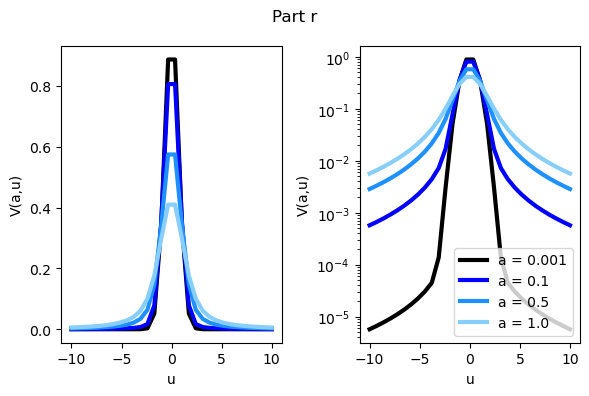

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,4))

a = 0.001
u_range = np.linspace(-10,10,30)
ax1.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='black', linewidth=3)
ax2.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='black', linewidth=3)
a = 0.1
u_range = np.linspace(-10,10,30)
ax1.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='blue', linewidth=3)
ax2.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='blue', linewidth=3)
a = 0.5
u_range = np.linspace(-10,10,30)
ax1.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='dodgerblue', linewidth=3)
ax2.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='dodgerblue', linewidth=3)
a = 1.0
u_range = np.linspace(-10,10,30)
ax1.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='lightskyblue', linewidth=3)
ax2.plot(u_range, [Voigt(a, u) for u in u_range], label='a = '+str(a), color='lightskyblue', linewidth=3)


ax2.legend(loc='lower right')
ax1.set(xlabel='u', ylabel='V(a,u)')
ax2.set(xlabel='u', ylabel='V(a,u)', yscale='log')

plt.suptitle('Part r')
plt.tight_layout()

plt.savefig('FinalProjectPlots/partR.pdf', dpi=300);


**Voigt Function.** The Voigt function, V(a,u), for various values of the parameter a. The right panel is the same as the left panel but with the y-axis in log-scale. Noticably, the Voigt profile for a = 1.0 is much broader than for smaller values of a. Additionally, the wings of the a = 1.0 Voigt profile are shifted upward compared to smaller values of a. The profile with a = 0.001 has the tallest peak, and the peak decreases for larger values of a. Another way of summarizing this is, for higher values of a, the Voigt profile both broadens horizontally and shrinks vertically.

# Part III

**Part III**- Finally, we come to the climax of our spectral lines exercise! With the
various functions you have written, you are now able to compute and plot stellar
spectral line profiles by combining the code you have for the solution of the
radiative transfer equation, with the code for α$_λ$ and τ$_λ$, including broadening.

s. Write a sequence of your functions that computes line profiles in the
Schuster-Schwarzschild two-layer approximation that we have adopted.
Hint: start by coding the emergent intensity in Equation 1, using τ computed from the extinction coefficient α$_λ$ in Equation 2, and take T$_l$ = 5700 K, T$_u$ = 4200 K, a = 0.1, λ = 5000$\dot{A}$. These values are good approximations for the solar photosphere, as seen in the optical part of the spectrum.

**Emergent intensity,**
$$
I = B_{lambda}(T_L)e^{-\tau} +  B_{lambda}(T_U)(1 - e^{-\tau})
$$
**Optical depth,**
$$
\tau_{\lambda}(h) = -\int_{\infty}^{h} \alpha_{\lambda} dl 
$$
$$
\tau_0 = \alpha_{\lambda} h 
$$
$$
\tau_{\lambda} = \tau_{0} V(a,u)
$$


In [60]:
def emergentIntensity(t_low, t_up, tau, wavelength_range):
    
    I = (Planck(t_low, wavelength_range) * np.exp(-tau)) + (Planck(t_up, wavelength_range) * (1 - np.exp(-tau)))
    return I

In [61]:
def getTau(alpha, height, a, u_range):
    lambda0 = 5000/1e+8
    c = 3e10
    k = 1.380658e-16      #cgs
    m_H = 1.6735575e-24
    
    lambda_D = lambda0/c * np.sqrt((2*k*dn['temp']/m_H) + (dn['vTurb']*100000)**2)
    
    tau0 = - alpha * height * [Voigt(a, u) for u in u_range]/np.sqrt(lambda_D*np.pi)
    return tau0

In [62]:
#important values
g_u = 4.0
g_l = 2.0
E_u = 2.1044/6.242e+11 #erg
E_l = 0.0
ionization_energy_Na = 5.13908/6.242e+11 #erg
U_II = 6.0
U_I = 1.0
wave = 5889.95/1e+8 #cm
f_lu = 0.641        #oscillator strength
T = dn['temp']
n_H = dn['n_H']

#calculate Boltzmann, Saha, and Boltzmann-Saha as a function of temperature
boltz = Boltzmann(g_u, g_l, E_u, E_l, T)                       #Boltzmann
saha = Saha(U_II, U_I, T, ionization_energy_Na, dn['n_e'])     #Saha
nl_nE = Saha_Boltzmann(boltz, saha)                            #Boltzmann-Saha

alpha = alpha_NaD(nl_nE, wave, f_lu, T, n_H)                   #Extinction coefficient


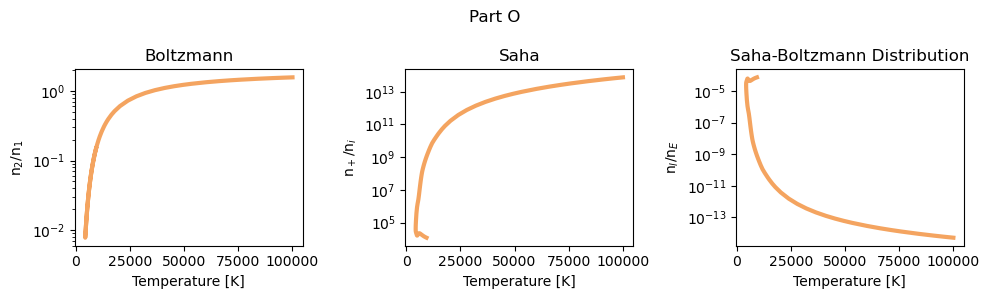

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,3))

ax1.plot(dn['temp'], boltz, color='sandybrown', linewidth=3)
ax1.set(xlabel='Temperature [K]', ylabel='n$_2$/n$_1$', title='Boltzmann')
ax1.set(yscale='log')

ax2.plot(dn['temp'], saha, color='sandybrown', linewidth=3)
ax2.set(xlabel='Temperature [K]', ylabel='n$_+$/n$_i$', title='Saha')
ax2.set(yscale='log')

ax3.plot(dn['temp'], nl_nE, color='sandybrown', linewidth=3)
ax3.set(xlabel='Temperature [K]', ylabel='n$_l$/n$_E$', title='Saha-Boltzmann Distribution')
ax3.set(yscale='log')

plt.suptitle('Part O')
plt.tight_layout()
plt.savefig('FinalProjectPlots/partO.pdf', dpi=300);

In [64]:
#Given values:
Tl = 5700                #K
Tu = 4200                #K
a = 0.1
wavelength = 5000/1e+8   #cm
u_range = np.linspace(-10,10,80)
h = dn['height']*100000

tau = getTau(alpha, h, a, u_range)

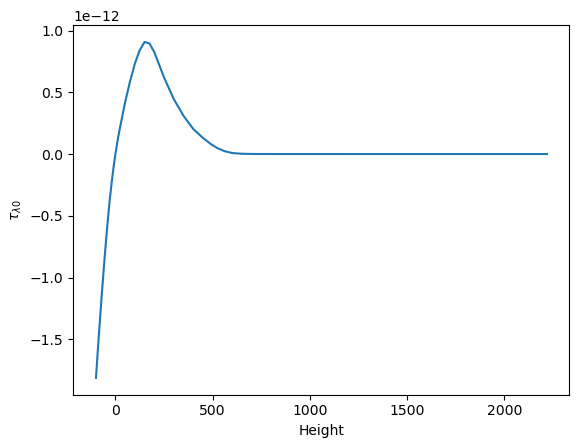

In [65]:
plt.plot(dn['height'], alpha*dn['height'])
plt.xlabel('Height')
plt.ylabel(r'$\tau_{\lambda0}$');

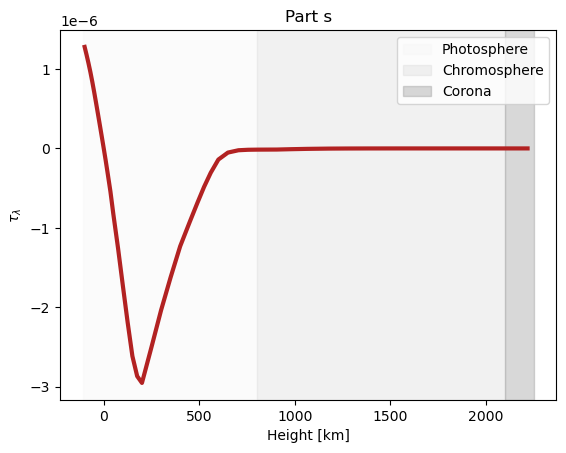

In [66]:
plt.plot(h/100000, tau, color='firebrick', linewidth=3)

plt.axvspan(-110, 800, color='whitesmoke', alpha=0.3, label='Photosphere')
plt.axvspan(800, 2100, color='lightgrey', alpha=0.3, label='Chromosphere')
plt.axvspan(2100, 2250, color='grey', alpha=0.3, label='Corona')


plt.xlabel('Height [km]')
plt.ylabel(r'$\tau_{\lambda}$')
plt.title('Part s')
plt.legend()
plt.savefig('FinalProjectPlots/partS.pdf', dpi=300);


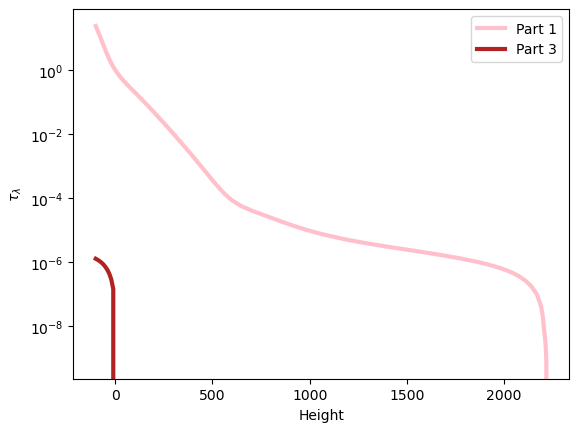

In [67]:
plt.plot(dn['height'], dn['tau_5000A'], label='Part 1', color='pink', linewidth=3)
plt.plot(h/100000, tau, color='firebrick', linewidth=3, label='Part 3')


plt.yscale('log')
plt.legend()
plt.xlabel('Height')
plt.ylabel(r'$\tau_{\lambda}$');
# plt.ylim(1e-10, 1e-1)

In [68]:
intensity = emergentIntensity(Tl, Tu, tau, u_range)
intensity

0     0.000005
1     0.000005
2     0.000006
3     0.000006
4     0.000007
        ...   
75    0.000007
76    0.000006
77    0.000006
78    0.000005
79    0.000005
Length: 80, dtype: float64

t. Plot a profile of I against u for τ (0) = 1. Use the dimensionless u = λ−λ$_0$/∆λ units for the wavelength scale so that you don’t have to evaluate
the Doppler width ∆λ$_D$ 

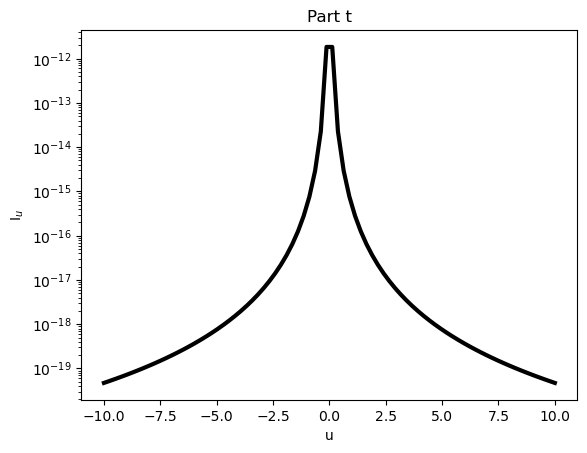

In [69]:
plt.plot(u_range, intensity/10**14, color='black', linewidth=3)

plt.xlabel('u')
plt.ylabel('I$_{u}$')
# plt.xscale('log')
plt.yscale('log')
plt.title('Part t')

plt.savefig('FinalProjectPlots/partT.pdf', dpi=300);

In [70]:
# finalI = Planck(5700, df['wavelength']) + intensity

In [71]:
wav = np.arange(1e-5, 8.1e-4, 0.00001) #wavelength range [cm]
print(wav.shape)

finalI = Planck(6200, wav)/10**14 + intensity/10**14

(80,)


In [72]:
finalI_cont = Planck(6200, wav)/10**14

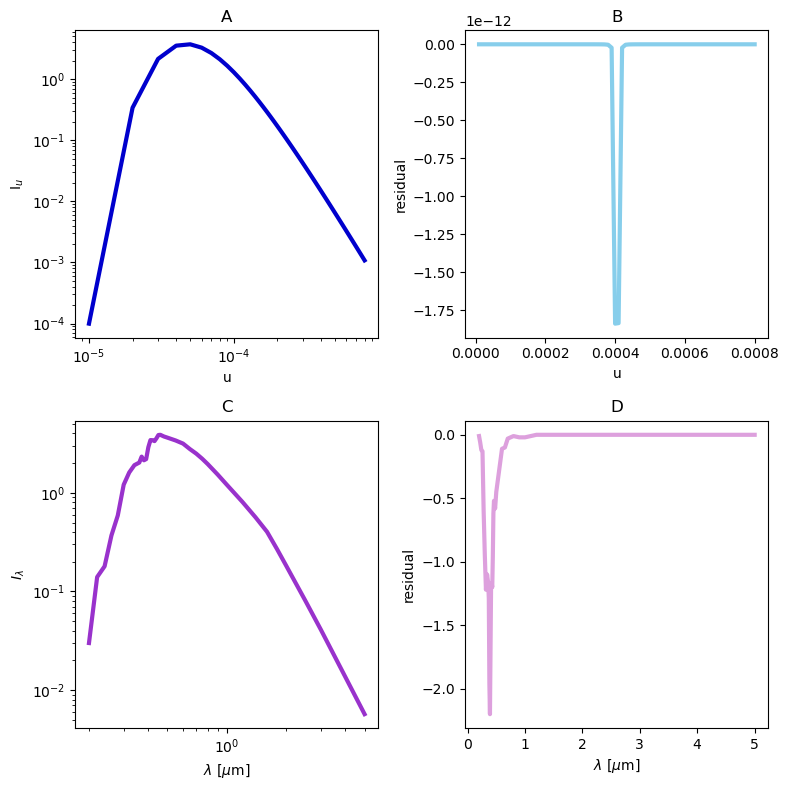

In [73]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.plot(wav, finalI, color='mediumblue', linewidth=3)
ax1.set(xlabel='u', ylabel='I$_u$', title='A')
ax1.set(xscale='log', yscale='log')

# ax2.plot(wav, finalI-finalI_cont, color='skyblue', linewidth=3)
ax2.plot(wav, finalI_cont-finalI, color='skyblue', linewidth=3)
ax2.set(xlabel='u', ylabel='residual', title='B')

ax3.plot(df['wavelength'], df['intensity'], color='darkorchid', linewidth=3)
ax3.set(xlabel=r'$\lambda$ [$\mu$m]', ylabel=r'$I_{\lambda}$', title='C')
ax3.set(xscale='log', yscale='log')

ax4.plot(df['wavelength'], df['intensity']-df['intensity_prime'], color='plum', linewidth=3)
ax4.set(xlabel=r'$\lambda$ [$\mu$m]', ylabel='residual', title='D')

plt.tight_layout()
plt.savefig('FinalProjectPlots/partU.pdf', dpi=300);

u. Finally, compare your line profile emergent intensity for the Na I D1 line in the Solar spectrum. How do they compare? Was there another source of opacity that should have been taken into account in our model? Explain.

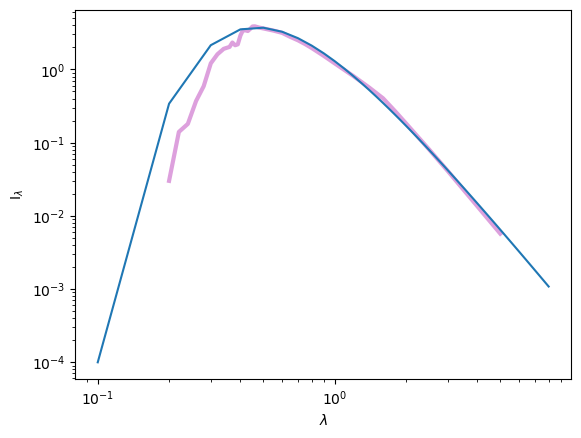

In [80]:
ax = plt.gca()
# ax2 = ax.twiny()

ax.plot(df['wavelength'], df['intensity'], label=r'I$_{\lambda}$', color='plum', linewidth=3)
ax.plot(wav*10000, finalI)
ax.set(xscale='log', yscale='log', xlabel=r'$\lambda$', ylabel=r'I$_{\lambda}$');

# ax2.plot(u_range, intensity)
# ax2.set(yscale='log', xlabel='u', ylabel=r'I$_{\lambda}$');

# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(2.46, 2.48)

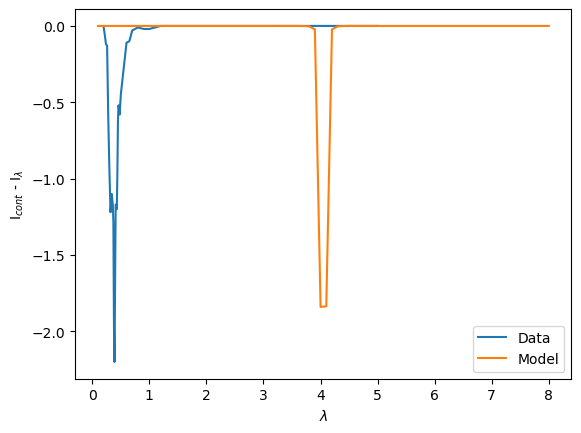

In [79]:
plt.plot(df['wavelength'], df['intensity']-df['intensity_prime'], label='Data')
plt.plot(wav*10000, (finalI_cont-finalI)*1e12, label='Model')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'I$_{cont}$ - I$_{\lambda}$')
plt.legend();
# plt.xscale('log')
# plt.yscale('log')